# Introduction

This project tasked us with finding the "best" neighborhood in Pittsburgh. We were given the freedom to choose any metric used to measure "bestness", and did so with the goal of finding a definitive answer to a subjective question. Our approach was to undergo choosing a metric that was more realistic and grounded. While other metrics may be more fun than the ones we considered, we operated under the assumption it would be rather difficult to put together a data-driven analysis of "bestness" while working with unusual data. 

Originally, we considered using emergency services as our metric of choice. There were two driving factors behind this decision: firstly, that needing a lesser police, EMS, and firefighting presence, the neighborhood would be generally safer, and secondly, that it would mean you would have to deal with hearing as few sirens as possible. We found rather useful data, but were struggling to put it together in a way that really made any sort of argument. On top of that, we struggled to find data on emergency medical services that could bolster the arguments we could come up with. So, in the end, this idea was scrapped.

Our final metric of "bestness" was "ease of finding good parking". Finding parking in the city can be a complete pain sometimes, which was the driving idea behind this metric. Parking data is well-documented and has a lot of location information, making it ideal for this project. Because of that, wanted to explore different parking related datasets, particularly regarding meters (mostly because they're highly inconvenient to deal with), which lead to the finalized version of our work. 

# The Metric

"Ease of finding good parking" isn't exactly the most clear metric. It's split into three sub-metrics:

1. Parking Meter Rates
2. Parking Meter Usage
3. Amount of active Parking Meters

The metric has one goal: determine which parking zone hits a sweet spot between having relatively cheap rates, being less frequently used, and having plenty of active meters. The first of the three is rather obvious— no one wants to pay more than they have to for parking. A major factor in "good" parking is cost. The second is a little bit less clear— the less a meter is used, the more likely there's an open spot at it. The third is fairly simple— the more available meters, the more likely there's an open spot at one. 

To do this, we used three datasets:
1. ["Space Counts and Rates"](https://data.wprdc.org/dataset/zone-and-lot-attributes/resource/4d4a0668-7905-4db6-985e-f7575a9e3160), which was used to determine meter rates by neighborhood
2. ["Transactions by Zone and Time of Day"](https://data.wprdc.org/dataset/parking-transactions/resource/1ad5394f-d158-46c1-9af7-90a9ef4e0ce1), which was used to determine how frequently transactions occurred at meters
3. ["Current Payment Points"](https://data.wprdc.org/dataset/pittsburgh-parking-meters-and-payment-points/resource/9ed126cc-3c06-496e-bd08-b7b6b14b4109), which was used to determine amounts of active meters

These datasets were analyzed in a variety of ways.

The dataset used to determine average rate by neighborhood involved an obscene amount of googling. The dataset lists locations as "zones", which are identifiers for each individual parking zone. Those parking zones had to be located, then those locations needed to be classified into the neighborhoods they were in. From there, it was as simple as filtering the data, and averaging out the rates. This dataset also included a total count of metered *zones*, which allowed us to gauge a general sense of which locations had large amounts of meters and which didn't. Despite this, we don't know how many of the meters were usable or active. The difference between meters and metered zones is important to differentiate between. Some metered zones are individual street meters, but others refer to entire parking lots all tied to one meter system, which could have caused a slight inconsistency in available parking. This is why we use other datasets to bolster this part. 

The dataset used to determine transactions lists the zones of the meters, the periods of time that the meters' transactions were observed for, the amount of transactions during those periods, as well as the type of transaction. The analysis of this dataset combined both mobile and meter transactions used to occupy a space at the meters in order to track total transactions of a meter. This was used as the primary form of measuring how frequently the meters were used. The total transactions were filtered by zone, and then that was analyzed to determine which zones were frequently used and which weren't.

The dataset used to determine the active meters played a major role in contextualizing the available data. If a zone has a lot of meters, but most of them are unusable, that zone is functionally terrible by our measurments. This analysis was split into two approaches: firstly, to determine percentages of active meters per zone, and secondly, to determine which zones have the most active meters. Determining the percentage of active meters showed which zones were most likely to have usable meters, but that isn't able to give us the whole picture. As shown in the individual analysis of this dataset, some zones with high percentages were only that high because they had very few meters, which is why the second approach was critical. By determining which zones had the most active meters, we were able to determine which zones most likely would have a lot of usable meters. 

# The Best Neighborhood

We took a very simple approach to apply our metric to our data. We looked at the best areas for the our individual sub-metrics, and looked for overlap between the top options.

Below is a bar chart of the meter rates, grouped by neighborhood, and a sample of the filtering process of the meter rates.

There are 5 zones in Shadyside.
                         zone       as_of  spaces  rate  \
_id                                                       
68   328 - Ivy Bellefonte Lot  2018-01-19      74   2.0   
101         414 - Mellon Park  2018-01-19      76   1.0   
148           411 - Shadyside  2017-11-15     345   1.5   
149                SHADYSIDE1  2017-11-15      65   NaN   
150                SHADYSIDE2  2017-11-15     280   1.5   

           rate_description  meters        type  
_id                                              
68                 $2.00/HR     5.0  off-street  
101                $1.00/HR     4.0   on-street  
148                $1.50/HR    52.0   on-street  
149  $1.50($2 after 2pm)/HR    52.0   on-street  
150                $1.50/HR    52.0   on-street  

The average rate of meters in Shadyside is 1.5 dollars per hour.
The total amount of meters in Shadyside is 165.0.


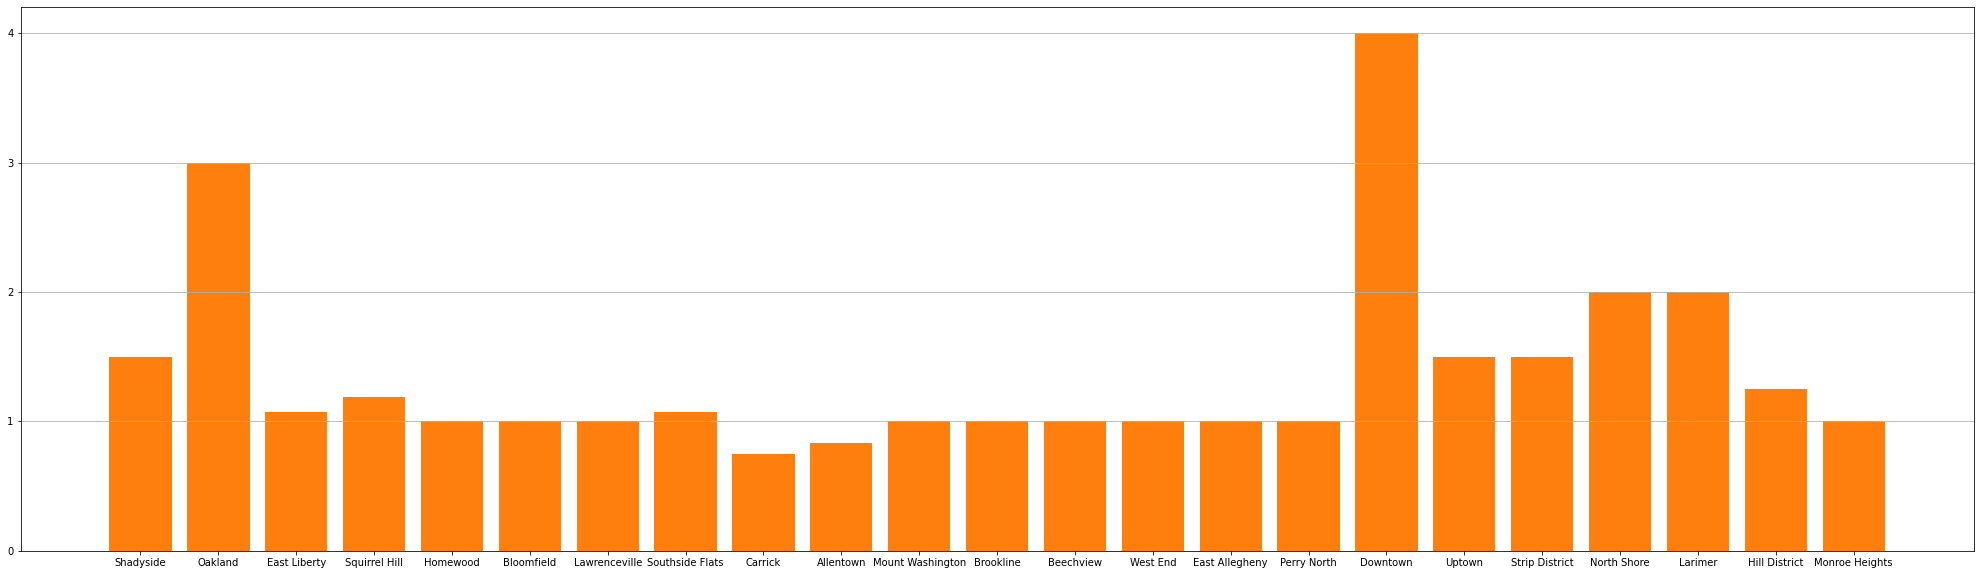

In [1]:
import pandas as pd

# read in file
rates = pd.read_csv("meter_rates.csv", index_col='_id')

# getting shadyside zones
shadyside_keywords = ["ivy bellefonte lot", "shadyside", "mellon park",]

shadyside_filter = rates['zone'].str.contains('|'.join(shadyside_keywords), case=False)
shadyside = rates[shadyside_filter]

# removing duplicates
shadyside2 = shadyside.drop_duplicates(subset='zone', keep='last')
print("There are " + str(len(shadyside2)) + " zones in Shadyside.")
print(shadyside2)

# finding relevant information about meters in shadyside
print("\n" + "The average rate of meters in Shadyside is " + str(round(shadyside2['rate'].mean(), 2)) + " dollars per hour.")
print("The total amount of meters in Shadyside is " + str(shadyside2['meters'].sum()) + ".")

import matplotlib.pyplot as plt

# turning summarized rates into a dictionary
averages = {'Shadyside': 1.50, 'Oakland': 3.00, 'East Liberty': 1.07, 'Squirrel Hill': 1.19, 'Homewood': 1.00, 'Bloomfield': 1.00, 'Lawrenceville': 1.00, 'Southside Flats': 1.07, 
            'Carrick': .75, 'Allentown': 0.83, 'Mount Washington': 1.00, 'Brookline': 1.00, 'Beechview': 1.00, 'West End': 1.00, 'East Allegheny': 1.00, 'Perry North': 1.00, 'Downtown': 4.00, 
            'Uptown': 1.50, 'Strip District': 1.50, 'North Shore': 2.00, 'Larimer': 2.00, 'Hill District': 1.25, 'Monroe Heights': 1.0}
avgs_names = list(averages.keys())
avgs_values = list(averages.values())

# plotting the data
plt.rcParams["figure.figsize"] = (35,10)
plt.yticks(ticks=[0, 1, 2, 3, 4], labels=["0", "1", "2", "3", "4"])
plt.bar(range(len(averages)), avgs_values, tick_label=avgs_names, width = 0.8)
plt.bar(range(len(averages)), avgs_values, tick_label=avgs_names)
plt.grid(axis= 'y')
plt.show()

Notably, a lot of neighborhoods' rates average out to 1 dollar per hour. Only two neighborhoods fall below this line, Carrick and Allentown, being 75 cents per hour and 83 cents per hour on average respectively. For purposes of our measurements, anything 2 dollars per hour or under was considered reasonable pricing.

Below is a sample of the filtering process for transactions. 

In [1]:
import pandas as pd

# Load your CSV file into a DataFrame
df = pd.read_csv("zones.csv", index_col='_id')

# List of neighborhoods to filter by
neighborhoods = ["403 - Uptown", "402 - Downtown 2", "421 - NorthSide"]

# Filter the DataFrame for the selected neighborhoods
filtered_df = df[df['zone'].isin(neighborhoods)]

# Print the first 10 entries of the filtered DataFrame
print(filtered_df[['zone', 'meter_transactions', 'mobile_transactions']].head(10).to_string(index=False))

            zone  meter_transactions  mobile_transactions
 421 - NorthSide                 0.0                  1.0
    403 - Uptown                 0.0                  1.0
 421 - NorthSide                 0.0                  1.0
402 - Downtown 2                 0.0                  1.0
402 - Downtown 2                 0.0                  3.0
 421 - NorthSide                 0.0                  1.0
    403 - Uptown                 0.0                  1.0
 421 - NorthSide                 0.0                  1.0
 421 - NorthSide                 0.0                  1.0
    403 - Uptown                 0.0                  1.0


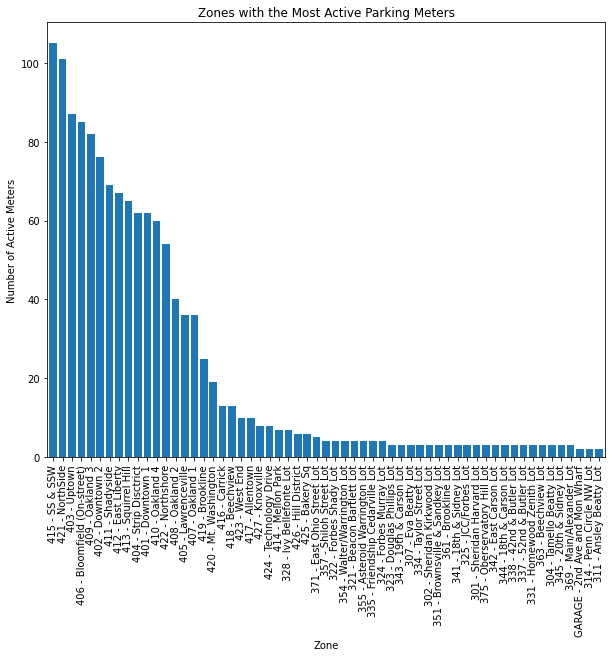

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('9ed126cc-3c06-496e-bd08-b7b6b14b4109.csv')

# Filter to include only active parking meters
active_meters = df[df['status'] == 'Active']

active_count_per_zone = active_meters['zone'].value_counts()

sorted_active_count = active_count_per_zone.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 8)) 
sorted_active_count.plot(kind='bar', width=0.8)  
plt.title('Zones with the Most Active Parking Meters') 
plt.xlabel('Zone')  
plt.ylabel('Number of Active Meters')  
plt.xticks(rotation=90)  
plt.show() 

This chart demonstrates that it's mostly a few, popular zones that have majority of the active meters. Namely, the "SS & SSW" parking zone, located in Southside Flats, and the "NorthSide" parking zone, located in Northside, were found to have the most active meters, by a sizable margin.

While some locations lended themselves more to some sub-metrics than others, Southside Flats consistently was found to be near ideal by all measurements. It's average meter cost was 1 dollar and 7 cents per hour, a massive difference from the prices of other locations with similar figures in terms of meter availibility, such as Oakland, Downtown, and Shadyside. It also ranked the *highest* in terms of active meters in a single zone, and not by a small margin compared to most zones, either. That particular zone in Southside Flats also ranked quite low in terms of transaction frequency. 

These individual results rank Southside Flats quite highly in terms of all sub-metrics, and when evaluated against all other notable neighborhoods that ranked highly in the sub-metrics, is the definitive best neighborhood by our metric. 

# Conclusions

Sophia's Conclusion: I'm a big homebody, and can be quite lazy about running errands, so, to me, the "best" neighborhood is probably the one closest to the places I'll need to go. This is a very difficult measurement to turn into a data-driven analysis. It would require mapping the places I frequent to locations and getting their distances to various neighborhoods, and a weighting of criteria— a rather tedious, subjective, and difficult task to accomplish. I think that a data-driven determination of the "best" neighborhood requires something with a lot of simple, but numerical and relevant data, like the metrics we considered. To make the determination data-driven requires it to be mostly stripped of subjectivity beyond the choice of metric, which is in and of itself a significant difference from the way I would personally choose a favorite. As much as I like the idea of living somewhere where parking is cheap and accessible, it wouldn't be my first choice when it comes to determining what my personal favorite would be. 

Senay's Conclusion: I would use accessibility and how simple it is to get to various locations as a criterion when selecting a neighborhood. The neighborhood where it is easiest to locate adequate parking is the one where this demand for convenience and a lively community vibe coincides. Residents who depend on their automobiles are served by the parking metric, which aims to make parking easier and less complicated while walkability encourages reduced reliance on cars and improves environmental quality. These measures provide ease and meet a range of lifestyle choices, improving everyday living.

Nitin's Conclusion: The data driven determination of the best neighborhood is a lot different than my personal favorite. First, we focused on a specific metric, in our case parking meters. This meant that we were wholly focused on a very specific metric in deciding our best neighborhood. Even if we used a bunch of different metrics, it would still be different than a personal favorite. Intangibles like architecture, the type of community, and more can be hard to be defined by metrics. And they are also very subjective, which is why depending on the person, they might prefer a different part of Pittsburgh.
